# Project-2 (Bigmart Sales Pridiction)

In [1]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the data set
bigmart_train=pd.read_csv('bigdatamart_Train.csv')
bigmart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Let's check the summary statistics of the data set
bigmart_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# Let's check the datatype of attributes
bigmart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
bigmart_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
#Let's check for the missing values
bigmart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

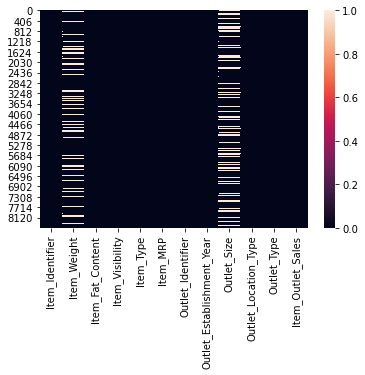

In [7]:
#Let's ceck the heat map for better visual
sns.heatmap(bigmart_train.isnull())
plt.show()

#### We can observe that Item Weight and Outet size have mising values

In [8]:
# check for categorical attributes
cat_col = []
for x in bigmart_train.dtypes.index:
    if bigmart_train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(bigmart_train[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
# fill the missing values
item_weight_mean = bigmart_train.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_val = bigmart_train['Item_Weight'].isnull()
miss_val

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
for i, item in enumerate(bigmart_train['Item_Identifier']):
    if miss_val[i]:
        if item in item_weight_mean:
            bigmart_train['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            bigmart_train['Item_Weight'][i] = np.mean(bigmart_train['Item_Weight'])

In [14]:
bigmart_train['Item_Weight'].isnull().sum()

0

In [15]:
outlet_size_mode = bigmart_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
miss_val = bigmart_train['Outlet_Size'].isnull()
bigmart_train.loc[miss_val, 'Outlet_Size'] = bigmart_train.loc[miss_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
bigmart_train['Outlet_Size'].isnull().sum()

0

In [18]:
sum(bigmart_train['Item_Visibility']==0)

526

In [19]:
# replace zeros with mean
bigmart_train.loc[:, 'Item_Visibility'].replace([0], [bigmart_train['Item_Visibility'].mean()], inplace=True)

In [20]:
sum(bigmart_train['Item_Visibility']==0)

0

In [21]:
bigmart_train['Item_Fat_Content'] = bigmart_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
bigmart_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
bigmart_train['New_Item_Type'] = bigmart_train['Item_Identifier'].apply(lambda x: x[:2])
bigmart_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
bigmart_train['New_Item_Type'] = bigmart_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
bigmart_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
bigmart_train.loc[bigmart_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
bigmart_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
# create small values for establishment year
bigmart_train['Outlet_Years'] = 2013 - bigmart_train['Outlet_Establishment_Year']

In [26]:
bigmart_train['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

## Data Visualization and Featured Engineering

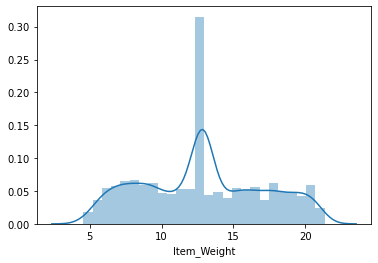

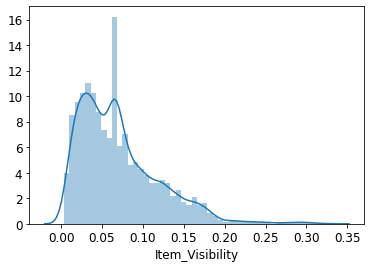

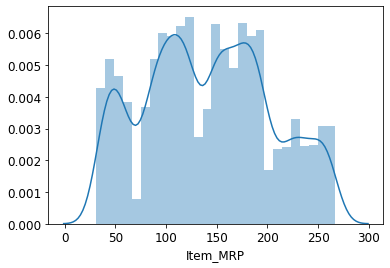

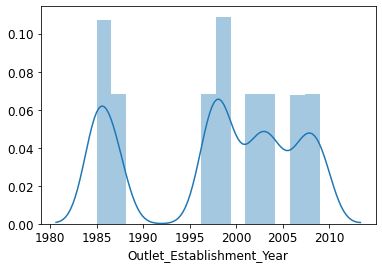

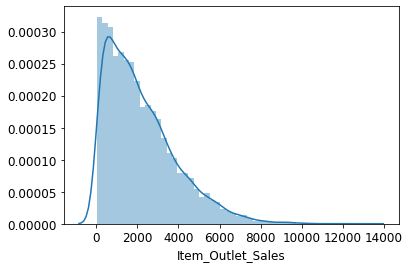

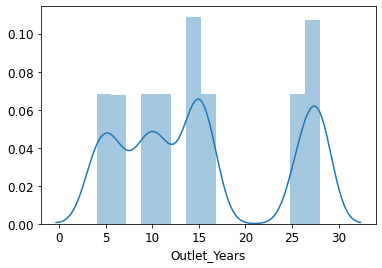

In [27]:
for i in bigmart_train.describe().columns:
    sns.distplot(bigmart_train[i].dropna())
    plt.rcParams.update({'font.size': 12})
    plt.show();

In [ ]:
We can observe that most of the items have low visibiity and it is skewed towards right side

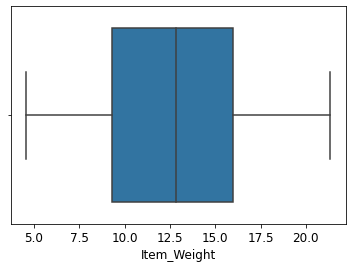

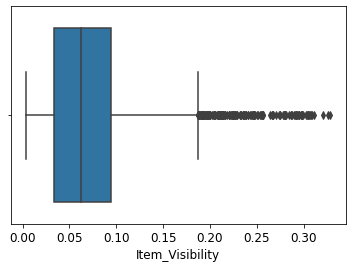

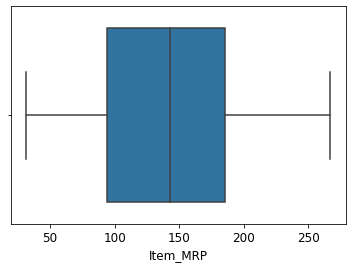

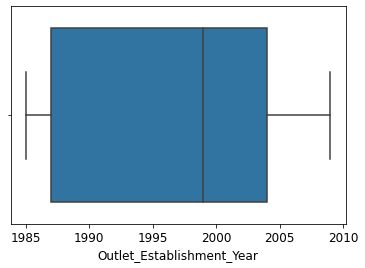

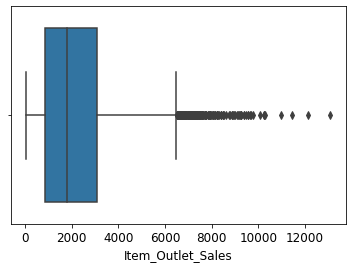

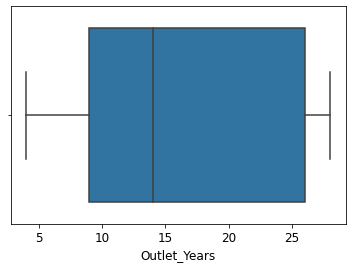

In [28]:
for i in bigmart_train.describe().columns:
    sns.boxplot(bigmart_train[i].dropna())
    plt.show();

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

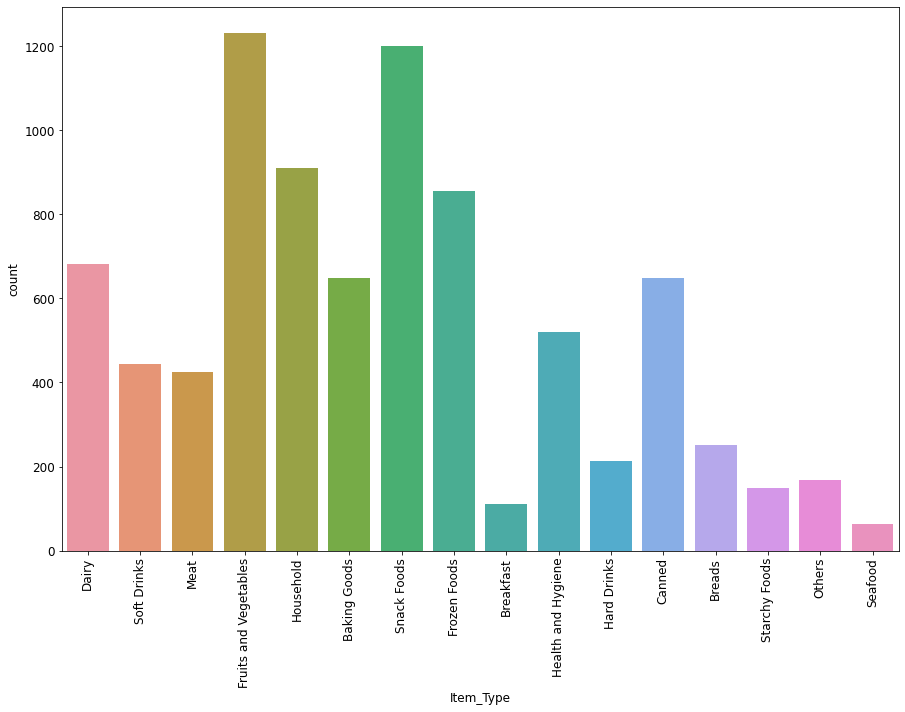

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(bigmart_train.Item_Type);
plt.xticks(rotation=90);
bigmart_train.Item_Type.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

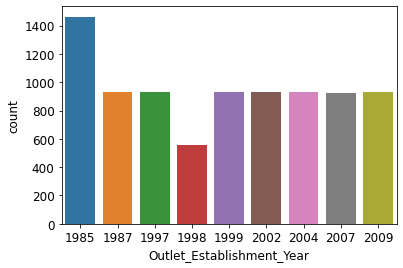

In [30]:
sns.countplot(bigmart_train['Outlet_Establishment_Year'])
bigmart_train.Outlet_Establishment_Year.value_counts()

In [31]:
bigmart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

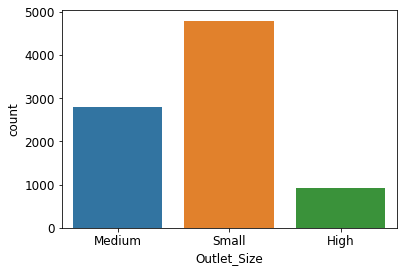

In [32]:
sns.countplot(bigmart_train.Outlet_Size);
bigmart_train.Outlet_Size.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

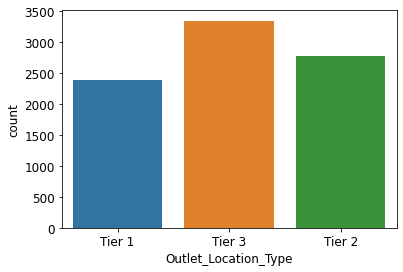

In [33]:
sns.countplot(bigmart_train.Outlet_Location_Type);
bigmart_train.Outlet_Location_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

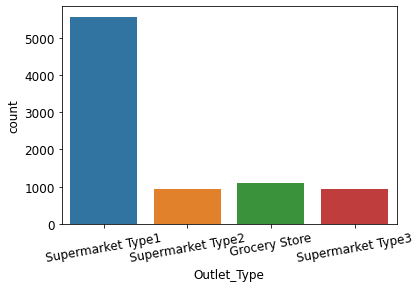

In [34]:
sns.countplot(bigmart_train.Outlet_Type);
plt.xticks(rotation=10);
bigmart_train.Outlet_Type.value_counts()

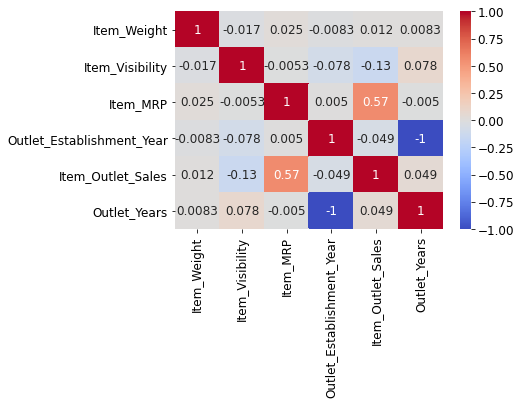

In [35]:
corr = bigmart_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bigmart_train['Outlet'] = le.fit_transform(bigmart_train['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    bigmart_train[col] = le.fit_transform(bigmart_train[col])

In [37]:
bigmart_train = pd.get_dummies(bigmart_train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
bigmart_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1


In [38]:
x = bigmart_train.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = bigmart_train['Item_Outlet_Sales']

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    model.fit(x, y)
    
    # predict the training set
    pred = model.predict(x)
    
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1271053.4638588056
CV Score: 1276808.5490380959


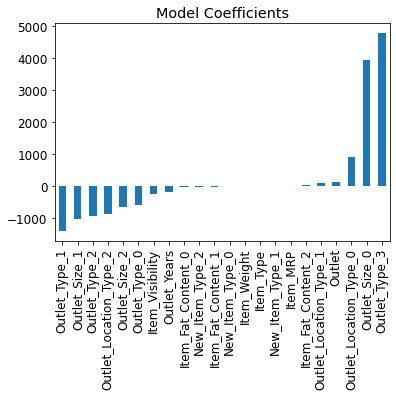

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients");

Model Report
MSE: 1621884.6809976725
CV Score: 1625215.6089171264


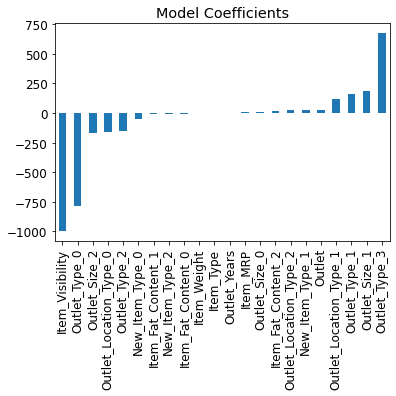

In [41]:
model = Ridge(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients");

Model Report
MSE: 1273297.7591122084
CV Score: 1278126.1092106488


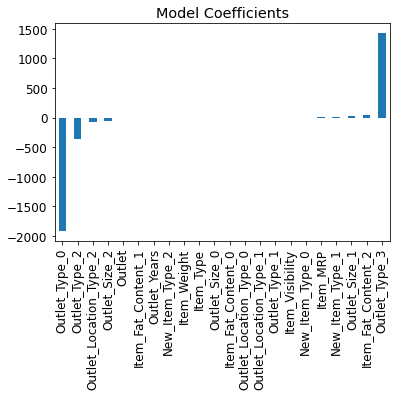

In [42]:
model = Lasso()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients");

Model Report
MSE: 0.0
CV Score: 2440872.1326071555


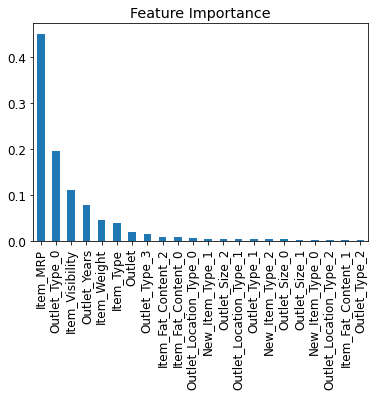

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");

Model Report
MSE: 183153.9926009818
CV Score: 1315153.5260555577


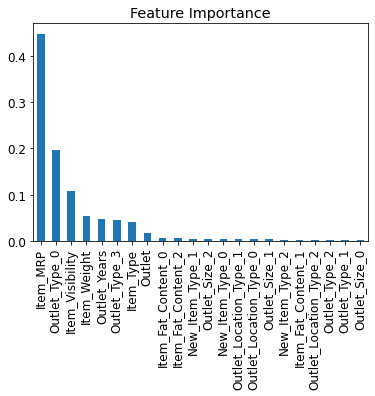

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");

Model Report
MSE: 0.035030398181505495
CV Score: 1408909.9190907006


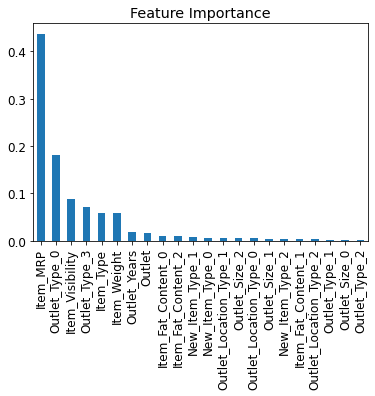

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [47]:
def perform_cross_validation(model_instance, x_train, y_train, x_test, y_test, cv = 10, scoring = make_scorer(metrics.mean_squared_error)):
    model = model_instance()
    model.fit(x_train, y_train)
    mse_train_values = cross_val_score(model, x_train, y_train, cv = cv, scoring = scoring)
    rmse_train_values = np.sqrt(mse_train_values)
    
    test_predictions = model.predict(x_test)
    mse_test_value = metrics.mean_squared_error(y_test, test_predictions)
    rmse_test_value = np.sqrt(mse_test_value)
    
    return rmse_train_values, rmse_test_value, model

In [48]:
def print_rmse_results(model_name, rmse_values, rmse_test_value):
    print(model_name + " rmse values mean:", rmse_values.mean())
    print(model_name + " rmse values std:", rmse_values.std())
    print(model_name + " rmse values min:", rmse_values.min())
    print(model_name + " rmse values max:", rmse_values.max())
    print()
    print(model_name + " rmse test set value:", rmse_test_value)

In [49]:
linreg_train_rmses, linreg_test_rmse, linreg_regressor = perform_cross_validation(LinearRegression, x_train, y_train, x_test, y_test)
print_rmse_results("Linear Regression", linreg_train_rmses, linreg_test_rmse)

Linear Regression rmse values mean: 1142.6300975835595
Linear Regression rmse values std: 51.17702829777096
Linear Regression rmse values min: 1057.7922506470331
Linear Regression rmse values max: 1218.7250485863256

Linear Regression rmse test set value: 1097.8725323186047
